# Part 1: Gradient Descent

In this lab we will implement some of the optimisation methods we learned in the lecture. First, we will start by revisiting gradient descent for linear regression. However, in this implementation we will observe how the model parameters are updated over iterations of the gradient descent algorithm. 

Let's start by implementing gradient descent on a simple linear regression dataset, like the one you generated in Lab 1, but this time shifted so that it ranges from -5 to 5.

tensor([[ 1.8754,  1.0000],
        [-2.2921,  1.0000],
        [-4.7672,  1.0000],
        [-0.3945,  1.0000],
        [-4.0120,  1.0000],
        [-3.6920,  1.0000],
        [-1.9914,  1.0000],
        [ 4.0486,  1.0000],
        [-2.3485,  1.0000],
        [-3.3900,  1.0000],
        [-0.9063,  1.0000],
        [ 0.8412,  1.0000],
        [ 0.0323,  1.0000],
        [ 3.9253,  1.0000],
        [ 4.6868,  1.0000],
        [-1.6234,  1.0000],
        [-0.6565,  1.0000],
        [-1.0540,  1.0000],
        [ 2.4993,  1.0000],
        [-0.7215,  1.0000],
        [ 2.7216,  1.0000],
        [-0.7603,  1.0000],
        [ 0.0958,  1.0000],
        [ 2.9305,  1.0000],
        [-3.5931,  1.0000],
        [ 0.6385,  1.0000],
        [-4.0395,  1.0000],
        [ 2.2941,  1.0000],
        [ 1.5320,  1.0000],
        [ 3.6699,  1.0000],
        [-0.7686,  1.0000],
        [-0.8715,  1.0000],
        [-2.0734,  1.0000],
        [ 4.6680,  1.0000],
        [ 0.9700,  1.0000],
        [ 1.5981,  1

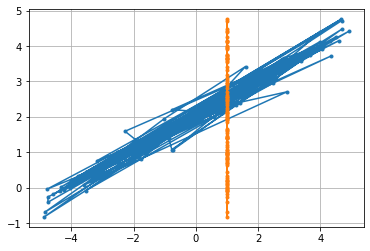

In [12]:
import torch
import matplotlib.pyplot as plt

## generate M data points roughly forming a line (noise added)
M = 100
theta_true = torch.Tensor([[0.5], [2]])

X = 10 * torch.rand(M, 2) - 5
X[:, 1] = 1.0
print(X)
y = torch.mm(X, theta_true) + 0.3 * torch.randn(M, 1)
print(y)
## visualise the data by plotting it
# YOUR CODE HERE
#raise NotImplementedError()
plt.plot(X, y, marker = '.')
plt.grid(True)

You should now have data points according to y = mx + b where m = theta_true[0,0] and b = theta_true[1,0]. Note, $m = \theta_1$ and $b = \theta_0$.

Now, let's implement gradient descent using the Mean Squared Error (MSE) cost function. 

Recall that: 

$J(\theta) = \frac{1}{2 M} \sum_{i = 1}^M (h_{\theta} (x^{(i)}) - y^{(i)} )^2$

for $i = 1 \text{  to iters (or until convergence)}$ <br>

$\hspace{1cm} w_i \leftarrow w_i - \eta \frac{\partial J}{\partial w_i}$

Implement the functions below in order to plot the cost function as well as the weight updates over iterations of gradient descent.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## hypothesis computes $h_theta$
def hypothesis(theta, X):
    # YOUR CODE HERE
    raise NotImplementedError()

## grad_cost_func computes the gradient of J for linear regression given J is the MSE 
def grad_cost_func(theta, X, y): 
    # YOUR CODE HERE
    raise NotImplementedError()

## cost_func computes the cost function J
def cost_func(theta, X, y): 
    # YOUR CODE HERE
    raise NotImplementedError()

Now let's plot the updates to see what is happening as we iterate over the algorithm. First, we will plot $J$ as a function of $\theta_1$ as well as the resulting equation of the line learned over $N=5$ iterations. Once your code is working, modify the value of $\eta$ to see how it affects convergence.

The figure below illustrates what you're aiming to plot. Note, much of the code to generate the figures is given below, you mostly need to complete the 3 functions above and then fill in a few missing lines of code below.

<img src="http://comp6248.ecs.soton.ac.uk/labs/lab3/Figure1.png">

### First generate the figure on the left hand side. This plot shows the data and the linear fit of the data as the model parameters change over the 5 iterations.

In [ ]:
## Now we can plot the lines over iterations
## To do this, we start by constructing a grid of parameter pairs and their corresponding cost function values. 
x_axis = np.linspace(-1,1,100)
theta_grid = torch.Tensor(len(x_axis),2)
theta_grid[:,0] = torch.from_numpy(x_axis)
theta_grid[:,1] = 2.0

J_grid = cost_func(theta_grid.t(), X, y)

N = 5
eta = 0.03

theta_0 = torch.Tensor([[0.0], [2.0]]) #initialise 
J_t = torch.Tensor(1,N)
theta = torch.Tensor(2,1,N)
J_t[:,0] = cost_func(theta_0, X, y)[0]
theta[:,:,0] = theta_0

for j in range(1,N):
    last_theta = theta[:,:,j-1]
    ## Compute the value of this_theta
    # YOUR CODE HERE
    raise NotImplementedError()
    theta[:,:,j] = this_theta
    J_t[:,j] = cost_func(this_theta,X,y)[0]

    
colors = ['b', 'g', 'm', 'c', 'orange']

## Plot the data 
# YOUR CODE HERE
raise NotImplementedError()

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Data and fit')

### Next, generate the plots on the right hand side. This figure is a plot of the cost function over the value of $\theta_1$ as well as the updates of $\theta_1$ over iterations.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# add the plot axes labels and title
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$J(\theta_1)$')
plt.title('Cost function')

### Finally, generate a contour plot of the cost function

In [ ]:
## Generate a grid of values for theta_0 and theta_1 and compute the cost function for every combination.

theta_0_vals = np.linspace(-1.0,1,100)
theta_1_vals = np.linspace(-4.0,4,100)
theta = torch.Tensor(len(theta_0_vals),2)

# Compute the cost function over every combination of values for theta in a variable called J which will then be plot below
# YOUR CODE HERE
raise NotImplementedError()

xc,yc = np.meshgrid(theta_0_vals, theta_1_vals)
contours = plt.contour(xc, yc, J, 20)
plt.clabel(contours)